# Linea de experimentacion 1

Como dijimos en al presentacion, nuestra experimentacion se divide en dos lineas de experimentacion. En este notebook se van a encontrar todas las experimentacion de la linea de experimentacion 1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Saneamiento de datos

en esta seccion vamos a tratar los datos erroneos o nulos que podrian alterar el comportamiento de nuestro predictor. Estos datos se descubrieron en la seccion de EDA.

In [2]:
path = "../dataset-tp3/expectativa_de_vida.csv"
df = pd.read_csv(path)

In [3]:
# cambiamos datos erroneos de india el promedio de la feature
india_index = df[df["Country"] == "India"].index[0]
df.loc[india_index,"under-five deaths"] = df["under-five deaths"].mean()
df.loc[india_index,"infant deaths"] = df["infant deaths"].mean()

In [32]:
# reemplazamos valores nulos por promedio de la feature
values = {}

cols = list(df.columns[3:-2])
cols.append(df.columns[-1])

print(cols)
for c in cols:
    
    values[c] = df[c].mean()

df = df.fillna(value = values)

['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Poisoning']


In [30]:
def pretty_displot(df, feature):
    
    plt.hist(df[feature], bins = 10)
    plt.title(feature, fontsize = 30)
    plt.ylabel("cantidad de paises", fontsize = 15)
    plt.xlabel(feature, fontsize = 15)

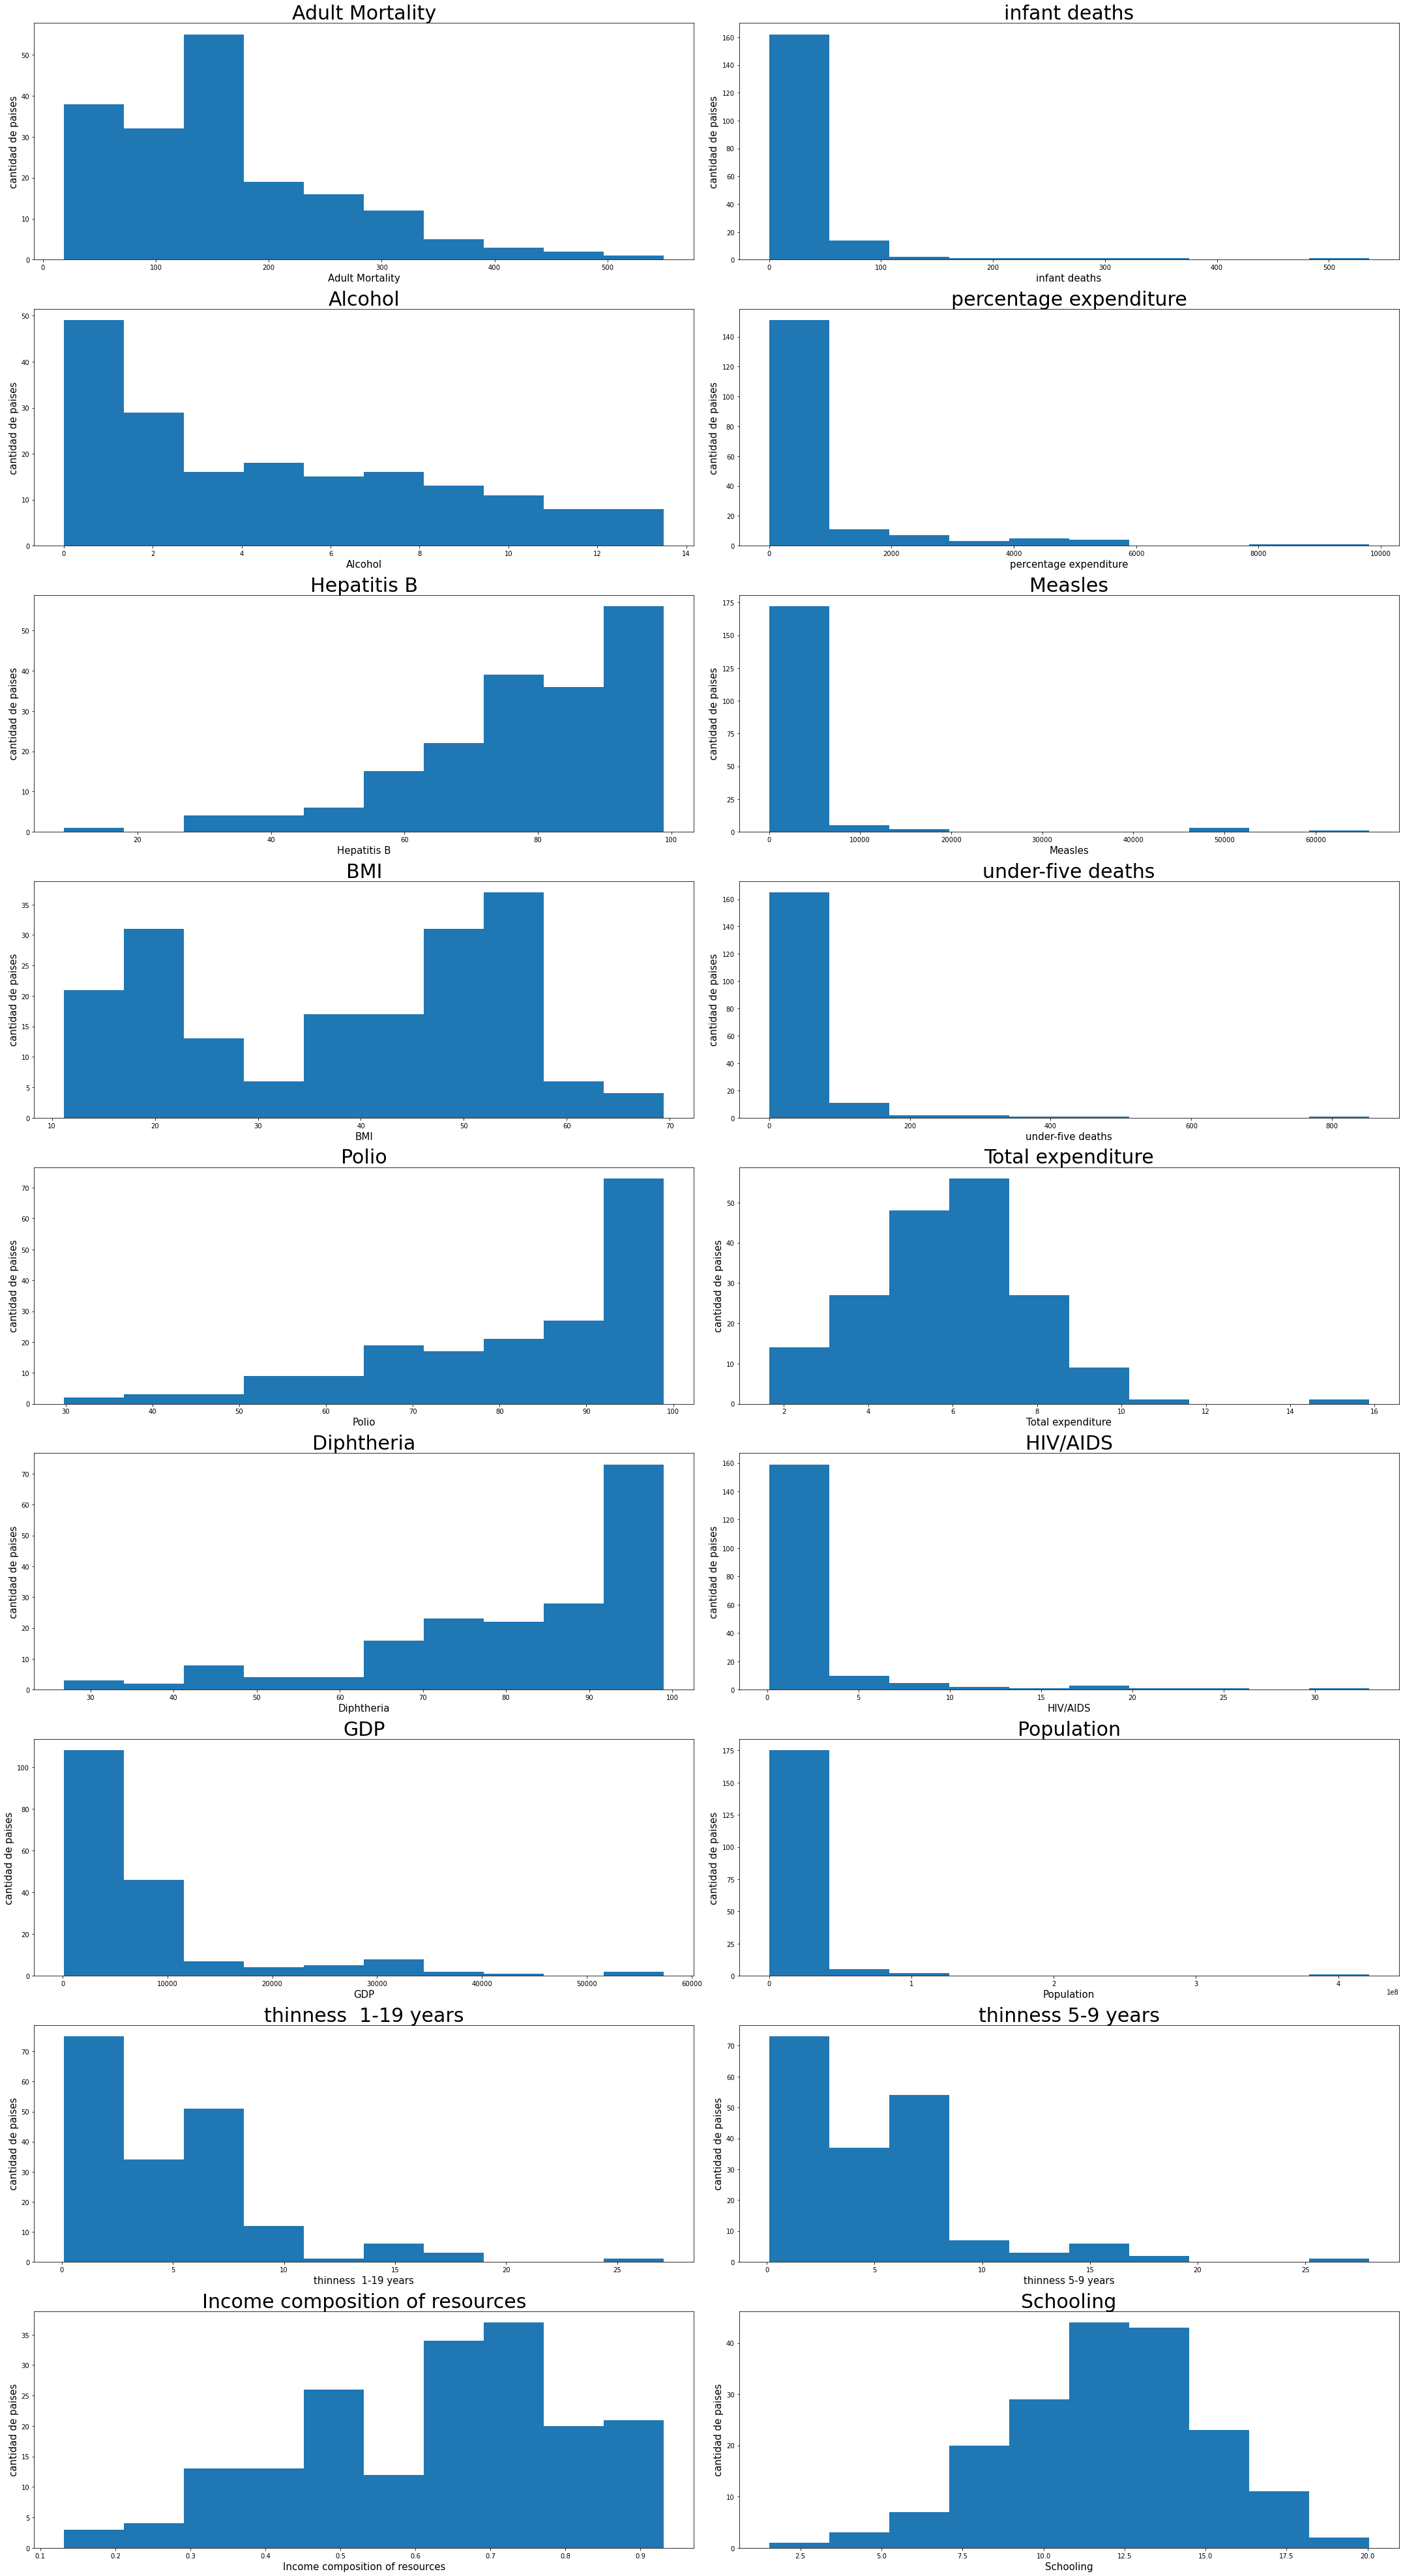

In [34]:
features = np.array(df.columns)
features = features[3:-1]

plt.figure(figsize = (30, 55))

x = 9
y = 2

for j in range(y):
    
    for i in range(x):
    
        plt.subplot(x, y, i + 1 + (x * j))
        pretty_displot(df, features[(j*9) + i])
        
plt.tight_layout()
plt.show()

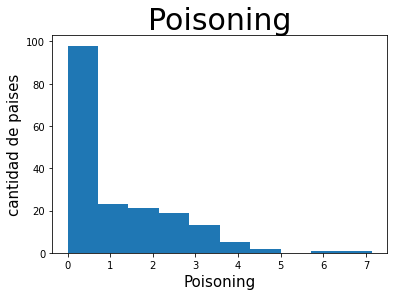

In [36]:
pretty_displot(df, "Poisoning")
plt.show()

# Agregar datos extras: suicidios

In [144]:
path = "../dataset-tp3/suicidios.csv"
df_s1 = pd.read_csv(path)

In [145]:
# creamos data frame con informacion de tasa de suicidio por pais
countries = df["Country"]
suicidios_rate = []

for c in countries:
    
    mean = df_s1[(df_s1["Location"] == c) & (df_s1["Dim1"] == "Both sexes")]["Value"].mean()
    suicidios_rate.append(mean)
    
df_s2 = pd.DataFrame({"suicide_rate": suicidios_rate})

values = {"suicide_rate": df_s2["suicide_rate"].mean()}
df_s2 = df_s2.fillna(value = values)

In [146]:
df = df.join(df_s2)

In [153]:
df.columns

Index(['Unnamed: 0', 'Country', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Status', 'suicide_rate'],
      dtype='object')

# EDA para suicide rate

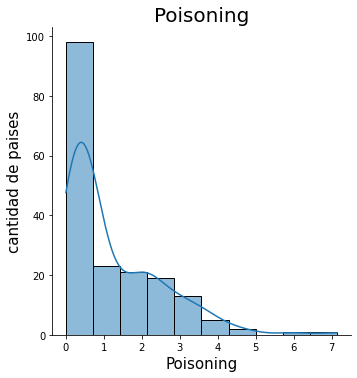

In [37]:
feature = "Poisoning"
sns.displot(df[feature], bins = 10, kde = True)
plt.title(feature, fontsize = 20)
plt.ylabel("cantidad de paises", fontsize = 15)
plt.xlabel(feature, fontsize = 15)
plt.show()

In [38]:
df_corr = df.corr()
cols = df_corr.columns

for c in cols:
    
    if abs(df_corr["Poisoning"][c]) > 0.7 and c != "Poisoning":
        
        print(c + ": " + str(df_corr["Poisoning"][c]))

In [42]:
df_corr = df.corr()
df_corr

,Unnamed: 0,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Poisoning
Unnamed: 0,1.000000,-0.017423,0.051565,-0.018497,-0.066897,-0.044053,-0.012023,-0.034746,0.021409,-0.010960,...,0.059861,-0.016574,0.103958,-0.027309,-0.022319,0.009467,0.025198,-0.027444,-0.025357,0.032201
Life expectancy,-0.017423,1.000000,-0.896441,-0.336245,0.458145,0.524320,0.411867,-0.201076,0.716881,-0.364644,...,0.288295,0.672322,-0.587153,0.579505,-0.036374,-0.518962,-0.511020,0.780377,0.758339,-0.388746
Adult Mortality,0.051565,-0.896441,1.000000,0.215736,-0.283670,-0.424081,-0.313249,0.098834,-0.614564,0.239227,...,-0.189910,-0.511538,0.696999,-0.476591,-0.008142,0.407209,0.409918,-0.621087,-0.578019,0.385979
infant deaths,-0.018497,-0.336245,0.215736,1.000000,-0.152345,-0.169418,-0.265239,0.708980,-0.373120,0.991866,...,-0.223228,-0.353022,0.088694,-0.193788,0.250614,0.321820,0.317151,-0.254450,-0.304104,0.179590
Alcohol,-0.066897,0.458145,-0.283670,-0.152345,1.000000,0.464644,0.140775,-0.088351,0.449365,-0.140169,...,0.422764,0.339388,-0.086641,0.452635,-0.048775,-0.502348,-0.487681,0.522235,0.578059,-0.055242
percentage expenditure,-0.044053,0.524320,-0.424081,-0.169418,0.464644,1.000000,0.030567,-0.110970,0.363641,-0.166664,...,0.237518,0.273418,-0.147532,0.923451,-0.059724,-0.364945,-0.366873,0.576492,0.553799,-0.093634
Hepatitis B,-0.012023,0.411867,-0.313249,-0.265239,0.140775,0.030567,1.000000,-0.267790,0.286234,-0.283263,...,0.139795,0.782107,-0.183576,0.118028,-0.188015,-0.213723,-0.221372,0.310444,0.360790,-0.153762
Measles,-0.034746,-0.201076,0.098834,0.708980,-0.088351,-0.110970,-0.267790,1.000000,-0.309661,0.697666,...,-0.169614,-0.258502,0.034536,-0.124897,0.469781,0.315636,0.314880,-0.131185,-0.155152,0.099781
BMI,0.021409,0.716881,-0.614564,-0.373120,0.449365,0.363641,0.286234,-0.309661,1.000000,-0.379792,...,0.386525,0.485899,-0.340292,0.431416,-0.132458,-0.714633,-0.717365,0.642628,0.667069,-0.254674
under-five deaths,-0.010960,-0.364644,0.239227,0.991866,-0.140169,-0.166664,-0.283263,0.697666,-0.379792,1.000000,...,-0.215915,-0.383612,0.106129,-0.193596,0.240439,0.320998,0.314117,-0.276091,-0.316699,0.199721


## Experimentacion

In [ ]:
!cd ../ && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python3)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

In [ ]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python3 --version
import metnum